<a href="https://colab.research.google.com/github/VarshaChanumolu/Comparison-of-different-Clustering-Algorithms-on-Health-Tweets/blob/main/TextAnalysis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/viznrvn/text-analysis-on-health-tweets/notebook

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/SEM 6/MLCR/Project_MLCR

/content/drive/MyDrive/SEM 6/MLCR/Project_MLCR


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import regex as re
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
with open("./TextAnalysisOnHealthTweets.txt") as f:
  lines = f.readlines()

In [ ]:
lines

['585978391360221184|Thu Apr 09 01:31:50 +0000 2015|Breast cancer risk test devised http://bbc.in/1CimpJF\n',
 '585947808772960257|Wed Apr 08 23:30:18 +0000 2015|GP workload harming care - BMA poll http://bbc.in/1ChTBRv\n',
 "585947807816650752|Wed Apr 08 23:30:18 +0000 2015|Short people's 'heart risk greater' http://bbc.in/1ChTANp\n",
 "585866060991078401|Wed Apr 08 18:05:28 +0000 2015|New approach against HIV 'promising' http://bbc.in/1E6jAjt\n",
 "585794106170839041|Wed Apr 08 13:19:33 +0000 2015|Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7\n",
 '585733482413891584|Wed Apr 08 09:18:39 +0000 2015|Review of case against NHS manager http://bbc.in/1Ffj6ci\n',
 "585733481608646657|Wed Apr 08 09:18:39 +0000 2015|VIDEO: 'All day is empty, what am I going to do?' http://bbc.in/1N7wSSz\n",
 "585701601131765761|Wed Apr 08 07:11:58 +0000 2015|VIDEO: 'Overhaul needed' for end-of-life care http://bbc.in/1CmrRu3\n",
 "585620828110397440|Wed Apr 08 01:51:00 +0000 2015|Care for dying 

In [ ]:
colName = ['tweetId', 'Date','News', 'Link']
regex = re.compile(r'(?P<tweetId>.*)\|(?P<Date>.*)\|(?P<News>.*)\s?(?P<Link>http://.*)')
re.search(regex, lines[0]).groupdict()

{'Date': 'Thu Apr 09 01:31:50 +0000 2015',
 'Link': 'http://bbc.in/1CimpJF',
 'News': 'Breast cancer risk test devised ',
 'tweetId': '585978391360221184'}

In [ ]:
tweets = pd.DataFrame(columns = colName)

for l in lines:
  lineData = re.search(regex, l).groupdict()
  tweets = tweets.append(lineData, ignore_index = True)


In [ ]:
tweets.head()

,tweetId,Date,News,Link
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised,http://bbc.in/1CimpJF
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll,http://bbc.in/1ChTBRv
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater',http://bbc.in/1ChTANp
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising',http://bbc.in/1E6jAjt
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors,http://bbc.in/1CnLwK7


In [ ]:
tweets.shape

(3929, 4)

In [ ]:
tweets.isnull().any()

tweetId    False
Date       False
News       False
Link       False
dtype: bool

##Lemmetizing the words

**Lemmetizing** is the process of finding the dictionary words of the words that are present in the sentence.

Like for example: 'rocks' after lemmetizing would be 'rock'.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

lemmatizer = WordNetLemmatizer()

In [ ]:
def normalizing(l):
  l = l.lower().strip()
  l = "".join([c for c in l if c not in string.punctuation+string.digits])
  return word_tokenize(l)

In [ ]:
def lemmatize_sent(lineToken):
    return list(map(lemmatizer.lemmatize, lineToken))

In [ ]:
def tokens(lineToken):
    wordTag = pos_tag(lineToken)
    return list(zip(*wordTag))[1]

In [ ]:
tweets['tokens'] = tweets['News'].map(normalizing)
tweets['tags'] = tweets['tokens'].map(tokens)
tweets['lemmatizedToken'] = tweets['tokens'].map(lemmatize_sent)

In [ ]:
tweets.head()

,tweetId,Date,News,Link,tokens,tags,lemmatizedToken
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised,http://bbc.in/1CimpJF,"[breast, cancer, risk, test, devised]","(NN, NN, NN, NN, VBD)","[breast, cancer, risk, test, devised]"
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll,http://bbc.in/1ChTBRv,"[gp, workload, harming, care, bma, poll]","(NN, NN, VBG, NN, NN, NN)","[gp, workload, harming, care, bma, poll]"
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater',http://bbc.in/1ChTANp,"[short, peoples, heart, risk, greater]","(JJ, NNS, NN, NN, JJR)","[short, people, heart, risk, greater]"
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising',http://bbc.in/1E6jAjt,"[new, approach, against, hiv, promising]","(JJ, NN, IN, NN, NN)","[new, approach, against, hiv, promising]"
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors,http://bbc.in/1CnLwK7,"[coalition, undermined, nhs, doctors]","(NN, VBD, JJ, NNS)","[coalition, undermined, nh, doctor]"


In [ ]:
tweets.tail()

,tweetId,Date,News,Link,tokens,tags,lemmatizedToken
3924,384766023120871424,Mon Sep 30 19:45:43 +0000 2013,Baby born after ovaries 'reawakened',http://bbc.in/16aLpG8,"[baby, born, after, ovaries, reawakened]","(NN, VBN, IN, NNS, VBD)","[baby, born, after, ovary, reawakened]"
3925,384700230920175617,Mon Sep 30 15:24:17 +0000 2013,Identical triplets born against odds,http://bbc.in/1aEywUI,"[identical, triplets, born, against, odds]","(JJ, NNS, VBN, IN, NNS)","[identical, triplet, born, against, odds]"
3926,384678543088562178,Mon Sep 30 13:58:06 +0000 2013,Hospital failed to make improvements,http://bbc.in/18Fulqi,"[hospital, failed, to, make, improvements]","(NN, VBD, TO, VB, NNS)","[hospital, failed, to, make, improvement]"
3927,384678542455222273,Mon Sep 30 13:58:06 +0000 2013,New patient targets pledge for NHS,http://bbc.in/17iVMb7,"[new, patient, targets, pledge, for, nhs]","(JJ, JJ, NNS, VBP, IN, NN)","[new, patient, target, pledge, for, nh]"
3928,384569546108964864,Mon Sep 30 06:44:59 +0000 2013,C. diff 'manslaughter' inquiry call,http://bbc.in/18DY3Mv,"[c, diff, manslaughter, inquiry, call]","(NNS, VBP, NN, NN, NN)","[c, diff, manslaughter, inquiry, call]"


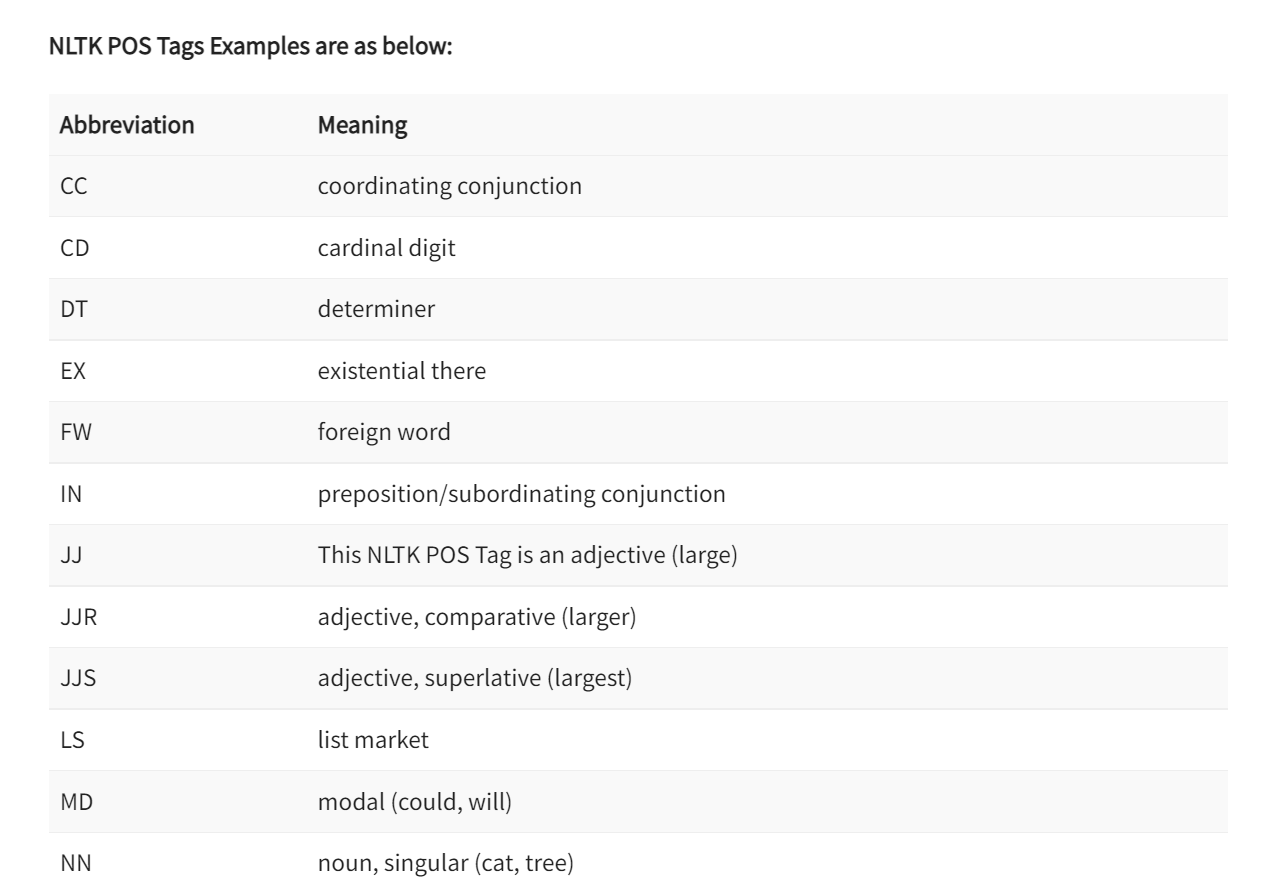
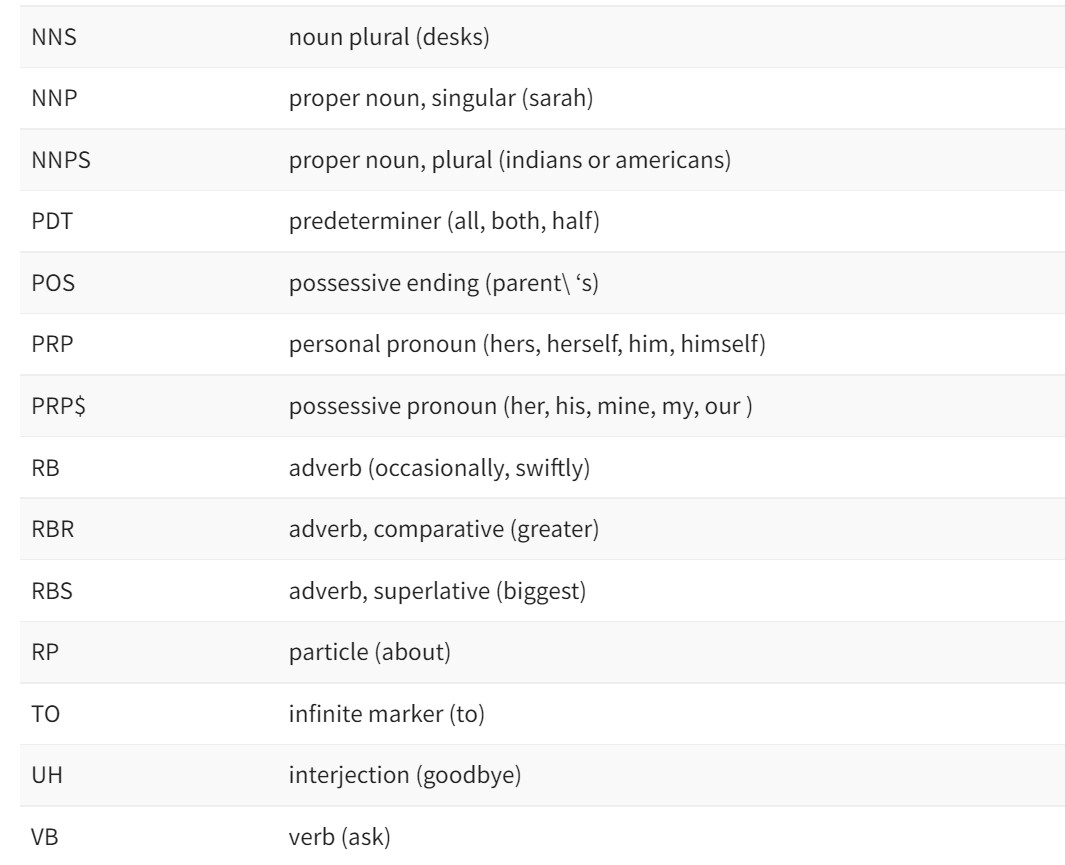
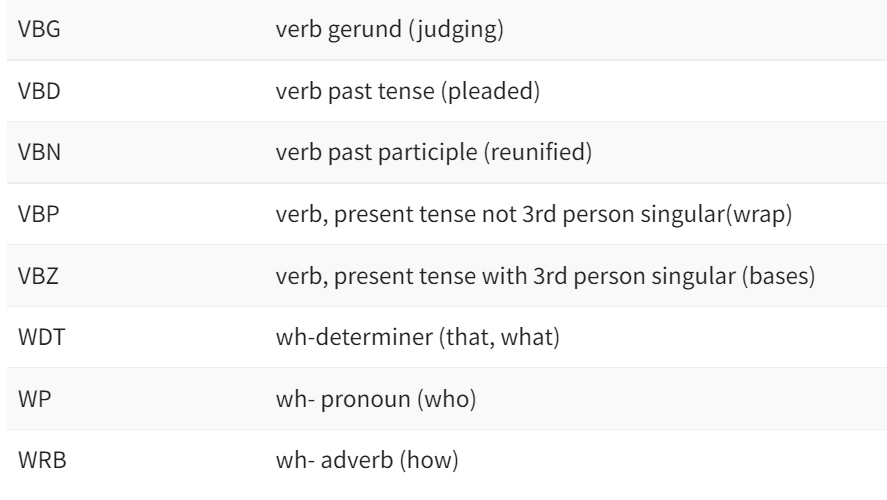

In [ ]:
tweets['tags'].unique()

array([('NN', 'NN', 'NN', 'NN', 'VBD'),
       ('NN', 'NN', 'VBG', 'NN', 'NN', 'NN'),
       ('JJ', 'NNS', 'NN', 'NN', 'JJR'), ...,
       ('JJ', 'NN', 'IN', 'NNS', 'VBG', 'NN'),
       ('NN', 'NN', 'VBD', 'PRP', 'VBD', 'DT', 'NN', 'NN'),
       ('NN', 'VBN', 'IN', 'NNS', 'VBD')], dtype=object)

In [ ]:
tweetsdf = tweets.drop(['tweetId','Date','Link'], axis = 1)
tweetsdf.head()

,News,tokens,tags,lemmatizedToken
0,Breast cancer risk test devised,"[breast, cancer, risk, test, devised]","(NN, NN, NN, NN, VBD)","[breast, cancer, risk, test, devised]"
1,GP workload harming care - BMA poll,"[gp, workload, harming, care, bma, poll]","(NN, NN, VBG, NN, NN, NN)","[gp, workload, harming, care, bma, poll]"
2,Short people's 'heart risk greater',"[short, peoples, heart, risk, greater]","(JJ, NNS, NN, NN, JJR)","[short, people, heart, risk, greater]"
3,New approach against HIV 'promising',"[new, approach, against, hiv, promising]","(JJ, NN, IN, NN, NN)","[new, approach, against, hiv, promising]"
4,Coalition 'undermined NHS' - doctors,"[coalition, undermined, nhs, doctors]","(NN, VBD, JJ, NNS)","[coalition, undermined, nh, doctor]"


In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidfMatrix = tfidf.fit_transform(tweetsdf['lemmatizedToken'].map(lambda x: ' '.join(x)).tolist())
tfidfMatrix

<3929x3955 sparse matrix of type '<class 'numpy.float64'>'
	with 22123 stored elements in Compressed Sparse Row format>

#KMEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(tfidfMatrix)

KMeans(n_clusters=4)

In [ ]:
kmeans.inertia_

3831.503134703722

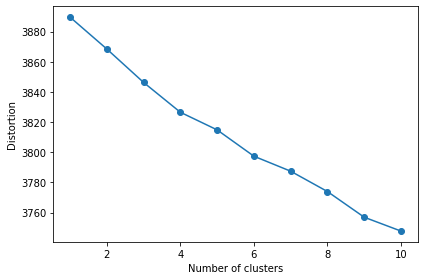

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

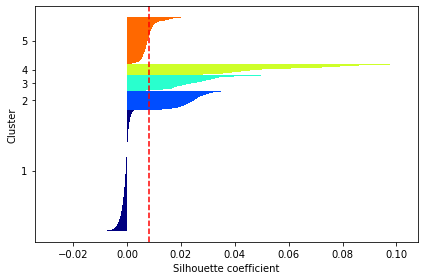

In [ ]:

km = KMeans(n_clusters=5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(tfidfMatrix)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(tfidfMatrix, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

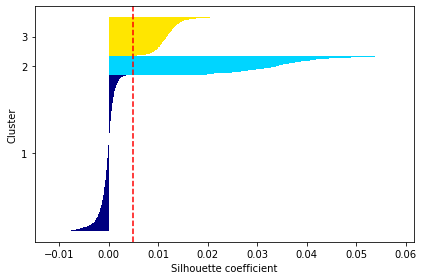

In [ ]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(tfidfMatrix)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(tfidfMatrix, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

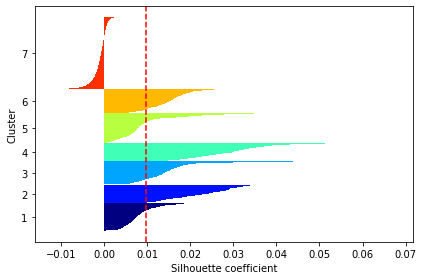

In [ ]:
km = KMeans(n_clusters=7, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(tfidfMatrix)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(tfidfMatrix, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [ ]:
type(tfidfMatrix.toarray())

numpy.ndarray

#AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters = 5, affinity="cosine", compute_distances = True, linkage="average")
y = agg.fit(tfidfMatrix.toarray())

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
   #print("counts : " + str(counts))
    n_samples = len(model.labels_)
    #print("n_samples : " + str(n_samples))
    for i, merge in enumerate(model.children_):
        current_count = 0
        #print(merge)
        for child_idx in merge:
            #print("child_idx : " + str(child_idx))
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
            #print("current_count : "  + str(current_count))
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,**kwargs)

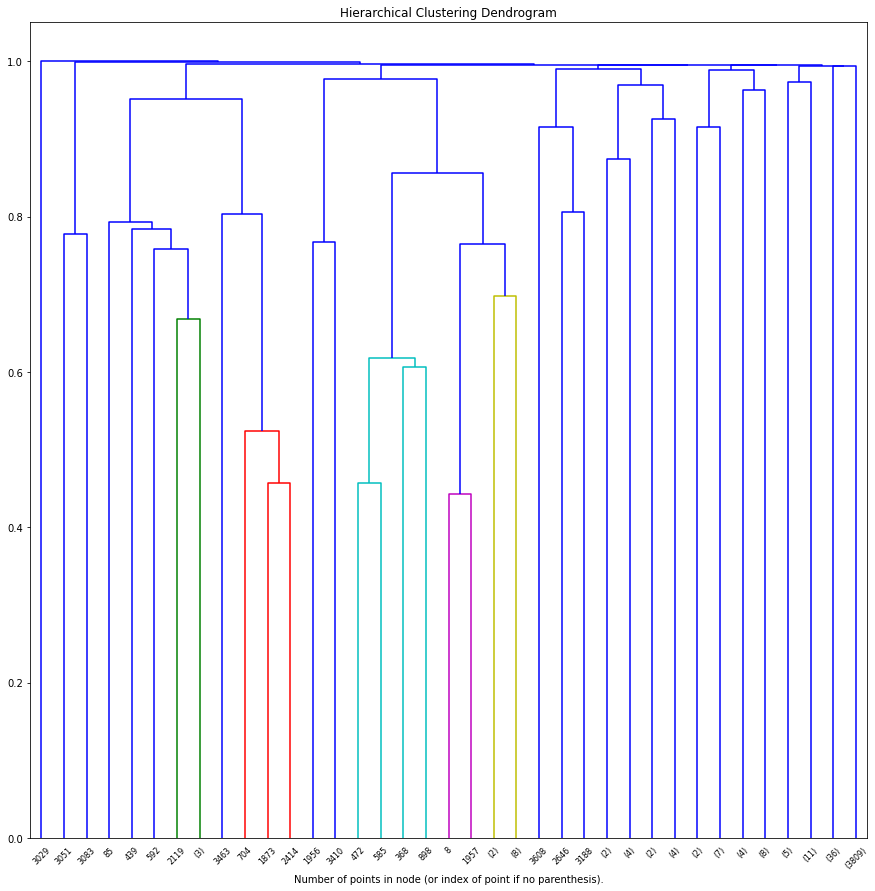

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p = 7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.6 ,min_samples=10,metric='cosine')
yDBSCAN = dbscan.fit(tfidfMatrix)


In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan.core_sample_indices_

array([  50,   56,  115,  121,  124,  199,  200,  234,  279,  333,  422,
        430,  647,  711,  740,  776,  782,  800,  825,  916,  934,  935,
        963, 1017, 1040, 1106, 1107, 1361, 1436, 1478, 1548, 1550, 1598,
       1623, 1720, 1807, 1880, 2053, 2187, 2220, 2236, 2354, 2383, 2476,
       2782, 2898, 2970, 3035, 3330, 3337, 3339, 3360, 3793])

In [ ]:
from sklearn.neighbors import NearestNeighbors


In [ ]:
nn = NearestNeighbors(n_neighbors = 10, metric = "cosine")
neighbours = nn.fit(tfidfMatrix)

In [ ]:
dist, indices = neighbours.kneighbors(tfidfMatrix)
dist

array([[0.        , 0.53769711, 0.56647882, ..., 0.70284013, 0.70309846,
        0.7041544 ],
       [0.        , 0.6673207 , 0.74319484, ..., 0.81127769, 0.83319872,
        0.86953287],
       [0.        , 0.68676315, 0.69668819, ..., 0.75529039, 0.75841337,
        0.76145859],
       ...,
       [0.        , 0.57686056, 0.70110765, ..., 0.75558944, 0.75581581,
        0.76411798],
       [0.        , 0.5555709 , 0.61750295, ..., 0.64767934, 0.64985829,
        0.65073599],
       [0.        , 0.6172687 , 0.67191145, ..., 0.72688814, 0.73436706,
        0.75367256]])

In [ ]:
indices

array([[   0, 3330, 3893, ..., 3288, 1720, 3921],
       [   1, 2029, 3803, ..., 3643, 3856, 2279],
       [   2, 1937,  191, ..., 2538, 3593, 3070],
       ...,
       [3926, 2385, 2897, ...,  665, 2482, 3348],
       [3927, 3449,  355, ..., 1302,  906,  234],
       [3928, 3753, 2417, ...,  818, 1913, 2190]])

In [ ]:
distances = np.sort(dist, axis=0)
distances

array([[0.00000000e+00, 0.00000000e+00, 1.66220947e-02, ...,
        4.14491359e-01, 4.19905602e-01, 4.54188493e-01],
       [0.00000000e+00, 0.00000000e+00, 1.66220947e-02, ...,
        4.16542777e-01, 4.45766726e-01, 4.61419461e-01],
       [0.00000000e+00, 0.00000000e+00, 1.66220947e-02, ...,
        4.26893923e-01, 4.50784444e-01, 4.74304224e-01],
       ...,
       [2.22044605e-16, 8.67263879e-01, 8.85389699e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.33066907e-16, 8.77862912e-01, 8.96742808e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.44089210e-16, 9.24475175e-01, 9.32303280e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
distances = distances[:,1]

In [ ]:
distances

array([0.        , 0.        , 0.        , ..., 0.86726388, 0.87786291,
       0.92447518])

Text(0, 0.5, 'Epsilon')

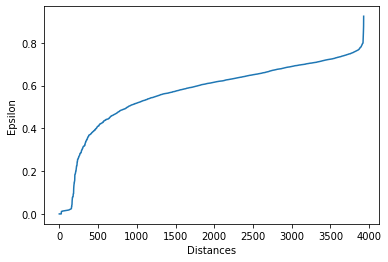

In [ ]:
plt.plot(distances)
plt.xlabel("Distances")
plt.ylabel("Epsilon")

In [ ]:
dbscan = DBSCAN(eps=0.72 ,min_samples=10,metric='cosine')
yDBSCAN = dbscan.fit(tfidfMatrix)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [ ]:
dbscan.core_sample_indices_

array([   0,    7,    8,   11,   17,   22,   24,   30,   48,   50,   51,
         56,   61,   66,   70,   72,   74,   92,   99,  100,  105,  115,
        119,  121,  124,  126,  133,  134,  137,  140,  143,  153,  158,
        166,  171,  176,  179,  186,  192,  194,  199,  200,  201,  203,
        209,  223,  234,  237,  249,  250,  252,  258,  266,  268,  271,
        278,  279,  280,  284,  291,  292,  294,  295,  305,  320,  326,
        327,  333,  341,  357,  364,  370,  376,  384,  387,  390,  391,
        399,  401,  405,  407,  408,  410,  412,  417,  421,  422,  423,
        430,  437,  447,  454,  457,  464,  466,  471,  473,  475,  478,
        503,  505,  508,  514,  516,  521,  523,  524,  526,  527,  528,
        532,  533,  534,  537,  542,  561,  562,  572,  574,  577,  579,
        580,  594,  599,  603,  612,  613,  614,  617,  618,  621,  627,
        629,  635,  636,  638,  640,  642,  645,  647,  648,  649,  654,
        657,  666,  668,  676,  677,  685,  686,  6

In [ ]:
dbscan75= DBSCAN(eps=0.75 ,min_samples=10,metric='cosine')
yDBSCAN75 = dbscan75.fit(tfidfMatrix)
dbscan75.core_sample_indices_

array([   0,    7,    8, ..., 3907, 3921, 3927])

In [ ]:
np.unique(dbscan75.labels_)

array([-1,  0,  1])

In [ ]:
dbscan78= DBSCAN(eps=0.78 ,min_samples=10,metric='cosine')
yDBSCAN78 = dbscan78.fit(tfidfMatrix)

In [ ]:
np.unique(dbscan78.labels_)

array([-1,  0])

In [ ]:
dbscan78.core_sample_indices_

array([   0,    2,    5, ..., 3926, 3927, 3928])

In [ ]:
dbscan79= DBSCAN(eps=0.79 ,min_samples=10,metric='cosine')
yDBSCAN79 = dbscan79.fit(tfidfMatrix)
dbscan79.core_sample_indices_

array([   0,    2,    3, ..., 3926, 3927, 3928])

In [ ]:
np.unique(dbscan79.labels_)

array([-1,  0])